In [142]:
import hdf5storage
file_path = 'indy_20170131_02.mat'
matfile = hdf5storage.loadmat(file_path)


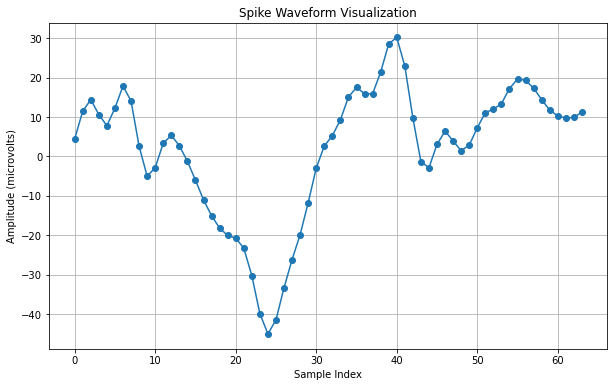

In [121]:
#spike波形可视化
import matplotlib.pyplot as plt
# Load spike waveform
spike_waveform = matfile['wf'][9][1][3]

# Plot the waveform
plt.figure(figsize=(10, 6))
plt.plot(spike_waveform, marker='o', linestyle='-')
plt.title('Spike Waveform Visualization')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (microvolts)')
plt.grid(True)
plt.show()

num_components的值18


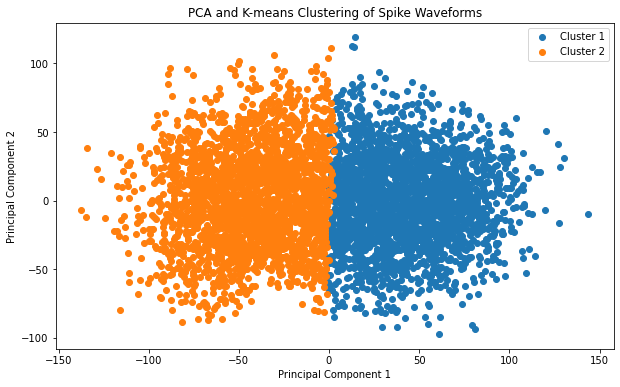

准确率为0.8913570274636511


In [141]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
waveform_1 = matfile['wf'][9][1]
waveform_2 = matfile['wf'][9][2]

# Add labels and concatenate data
label_1 = np.ones((waveform_1.shape[0], 1))  
label_2 = 2 * np.ones((waveform_2.shape[0], 1))  

# Concatenate data and labels
data_combined = np.concatenate((waveform_1, waveform_2), axis=0)
labels_combined = np.concatenate((label_1, label_2), axis=0)
# Load spike waveforms
spike_waveforms = data_combined 

# Apply PCA for dimensionality reduction
pca = PCA()
spike_waveforms_pca = pca.fit_transform(spike_waveforms)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain (e.g., 95% of the variance)
target_variance_ratio = 0.95
num_components = np.argmax(cumulative_variance_ratio >= target_variance_ratio) + 1
print(f"num_components的值{num_components}")
# Use the determined number of components
pca = PCA(n_components=num_components)
spike_waveforms_pca = pca.fit_transform(spike_waveforms)

# Apply K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(spike_waveforms_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(spike_waveforms_pca[cluster_indices, 0], spike_waveforms_pca[cluster_indices, 1], label=f'Cluster {i + 1}')

plt.title('PCA and K-means Clustering of Spike Waveforms')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

a=(labels_combined.T)[0]
counter=0
for i, label in enumerate(cluster_labels):
    #print(f"Waveform {i + 1} is in Cluster {label + 1}")
    if label+1==int(a[i]):
        counter+=1
accuracy=counter/4952
accuracy=max(accuracy,1-accuracy)
print(f"准确率为{accuracy}")